# Problem Statement

## Use K-Means clustering to segment customers based on behavioral and demographic data to enable targeted marketing strategies.

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load Dataset
df = pd.read_csv('E:/customer_segmentation_dataset.csv')
print(df.head())

   CustomerID  Age  Gender  Annual Income (k$)  Spending Score (1-100)  \
0           1   56    Male               70.09                   42.17   
1           2   46  Female               88.50                   50.36   
2           3   32    Male               77.35                   54.73   
3           4   60  Female               45.38                   83.45   
4           5   25    Male               56.07                   52.72   

   Purchase Frequency (per month) Product Category Preference  \
0                              10                     Grocery   
1                              11                  Home Decor   
2                               8                      Luxury   
3                              18                      Luxury   
4                               8                      Sports   

  Loyalty Membership  Years as Customer  
0                 No                  3  
1                Yes                 11  
2                Yes                 1

In [3]:
#Dataset Shape
print("Shape: ", df.shape)

#Dataset Info
print(df.info())

#Checking Nulls
print("Null: ", df.isnull().sum())

Shape:  (1000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CustomerID                      1000 non-null   int64  
 1   Age                             1000 non-null   int64  
 2   Gender                          1000 non-null   object 
 3   Annual Income (k$)              1000 non-null   float64
 4   Spending Score (1-100)          1000 non-null   float64
 5   Purchase Frequency (per month)  1000 non-null   int64  
 6   Product Category Preference     1000 non-null   object 
 7   Loyalty Membership              1000 non-null   object 
 8   Years as Customer               1000 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 70.4+ KB
None
Null:  CustomerID                        0
Age                               0
Gender                            0
Annual Income (k$)     

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Purchase Frequency (per month),Years as Customer
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.575000,65.966370,53.468140,10.166000,7.440000
std,288.819436,13.765677,20.974082,17.403206,3.795636,4.589277
min,1.000000,18.000000,20.000000,1.000000,1.000000,0.000000
25%,250.750000,30.000000,50.105000,41.120000,8.000000,4.000000
50%,500.500000,42.000000,64.225000,53.805000,10.000000,8.000000
75%,750.250000,53.000000,79.495000,66.070000,13.000000,11.000000
max,1000.000000,65.000000,142.200000,100.000000,20.000000,15.000000


# Exploratory Data Analysis (EDA)

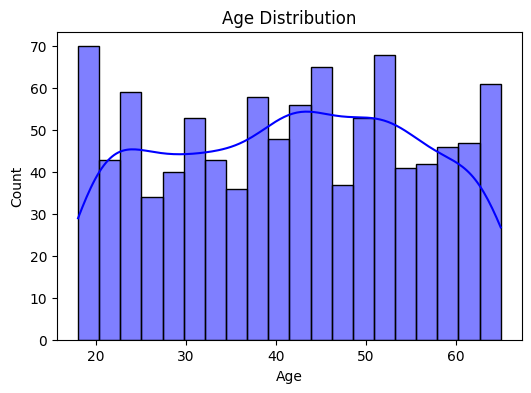

In [5]:
#Age Distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=20, kde=True, color="blue")
plt.title("Age Distribution")
plt.savefig("Age_distribution.png", dpi=300)
plt.show()

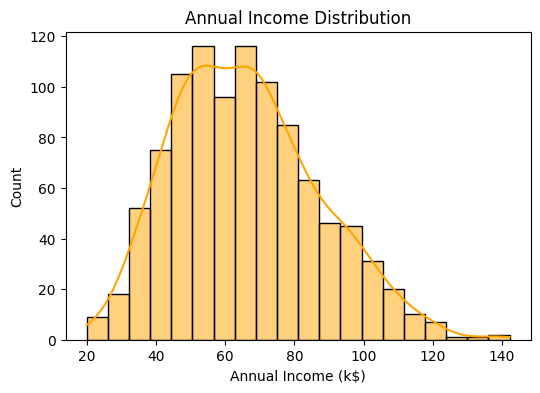

In [6]:
#Annual Income Distribution
plt.figure(figsize=(6,4))
sns.histplot(df["Annual Income (k$)"], bins=20, kde=True, color= "orange")
plt.title("Annual Income Distribution")
plt.savefig("Annual_income_distribution.png", dpi=300)
plt.show()

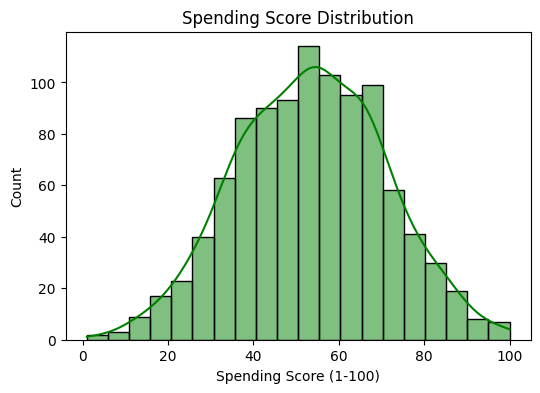

In [7]:
#Spending Score Distribution
plt.figure(figsize=(6,4))
sns.histplot(df["Spending Score (1-100)"], bins=20, kde= True, color= "green")
plt.title("Spending Score Distribution")
plt.savefig("Spending_Score_distribution.png", dpi=300)
plt.show()

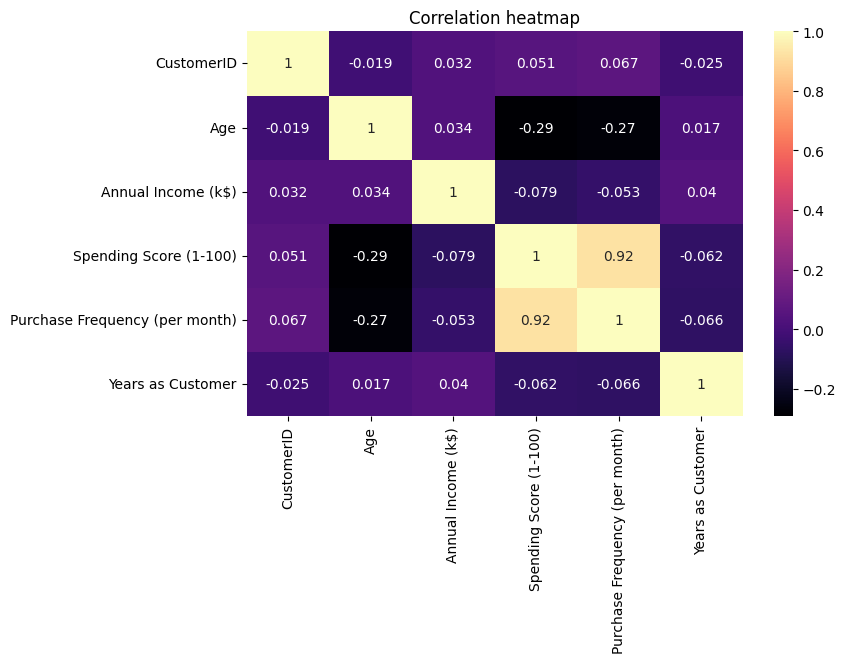

In [8]:
#Correlation Heatmap
plt.figure(figsize=(8,5))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap= "magma")
plt.title("Correlation heatmap")
plt.savefig("Correlation_Heatmap.png", dpi=300)
plt.show()

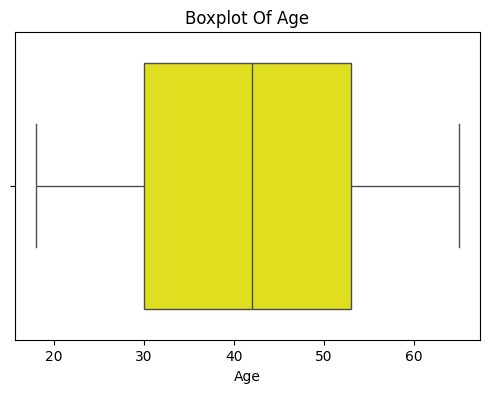

In [9]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Age'], color="yellow")
plt.title("Boxplot Of Age")
plt.savefig("Age_boxplot.png", dpi=300)
plt.show()

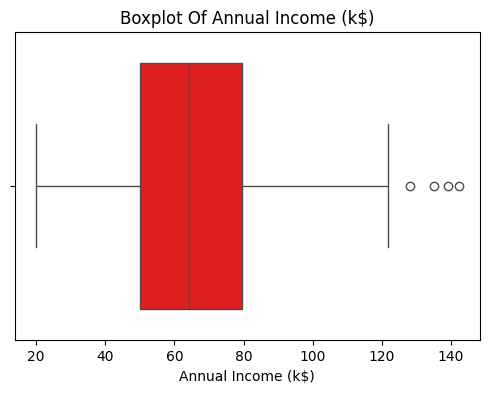

In [10]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Annual Income (k$)'], color="red")
plt.title("Boxplot Of Annual Income (k$)")
plt.savefig("Annual_Income(k$)_boxplot.png", dpi=300)
plt.show()

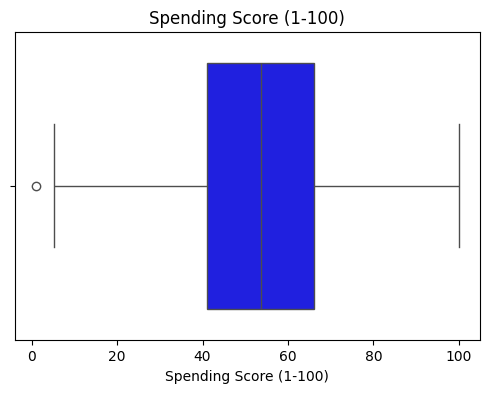

In [11]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Spending Score (1-100)'], color="blue")
plt.title("Spending Score (1-100)")
plt.savefig("Spending_Score(1-100).png", dpi=300)
plt.show()

# Encode Categorical & Scale Data

In [12]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
df_encoded = df.copy()
le = LabelEncoder()
df_encoded['Gender'] = le.fit_transform(df['Gender'])
df_encoded['Product Category Preference'] = le.fit_transform(df['Product Category Preference'])
df_encoded['Loyalty Membership'] = le.fit_transform(df['Loyalty Membership'])
features = ['Age', 'Gender', 'Annual Income (k$)', 'Spending Score (1-100)', 'Purchase Frequency (per month)',
            'Product Category Preference', 'Loyalty Membership', 'Years as Customer']
X = df_encoded[features]
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

# K-Means Clustering

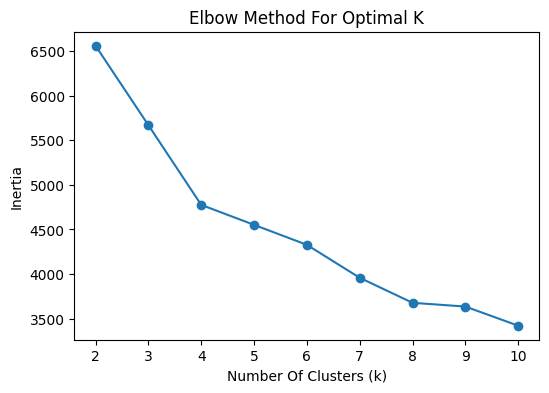

In [13]:
from sklearn.cluster import KMeans
inertia = []
K = range(2,11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(6,4))
plt.plot(K, inertia, marker = 'o')
plt.xlabel("Number Of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method For Optimal K")
plt.savefig("Elbow_Method_For_Optimal_K.png", dpi=300)
plt.show()

# Silhouette Score

In [14]:
from sklearn.metrics import silhouette_score
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(x_scaled)
    score = silhouette_score(x_scaled, labels)
    print("k =", k, "Silhouette Score =", score)

k = 2 Silhouette Score = 0.21463191878926588
k = 3 Silhouette Score = 0.21695326580418733
k = 4 Silhouette Score = 0.20652536583710301
k = 5 Silhouette Score = 0.20292896605389626
k = 6 Silhouette Score = 0.1952056746802722
k = 7 Silhouette Score = 0.18242502808172634
k = 8 Silhouette Score = 0.1817291677322212
k = 9 Silhouette Score = 0.17710367122345133
k = 10 Silhouette Score = 0.18638600361154545


# Final K-Means & PCA Visualization

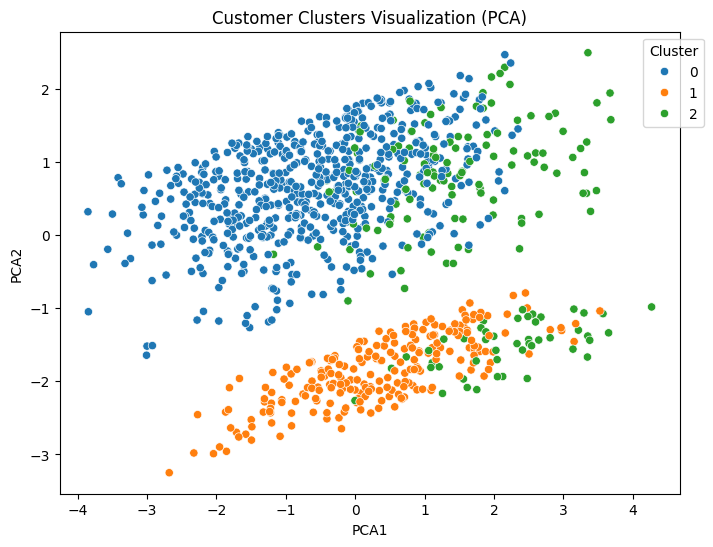

In [15]:
from sklearn.decomposition import PCA
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
df['Cluster'] = kmeans.fit_predict(x_scaled)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Cluster", palette="tab10")
plt.title("Customer Clusters Visualization (PCA)")
plt.legend(title="Cluster", bbox_to_anchor=(1.05,1))
plt.savefig("Customer Clusters Visualization(PCA).png", dpi=300)
plt.show()

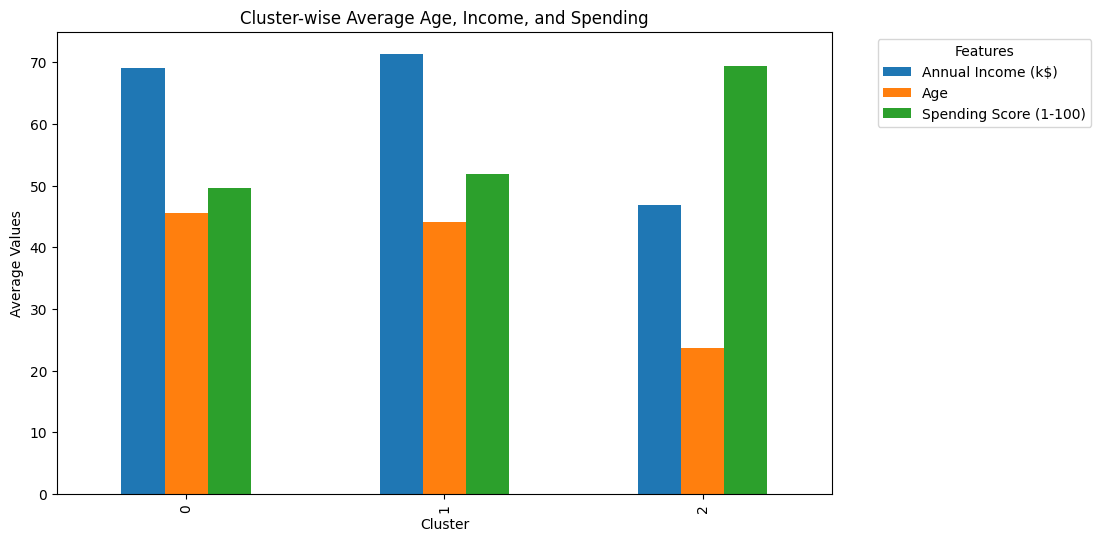

In [16]:
cluster_summary = df.groupby("Cluster")[["Annual Income (k$)", "Age", "Spending Score (1-100)"]].mean()
cluster_summary.plot(kind="bar", figsize=(10,6))
plt.title("Cluster-wise Average Age, Income, and Spending")
plt.ylabel("Average Values")
plt.xlabel("Cluster")
plt.legend(title="Features", bbox_to_anchor=(1.05,1))
plt.savefig("Cluster_Wise_Average_Summary.png", dpi=300)
plt.show()

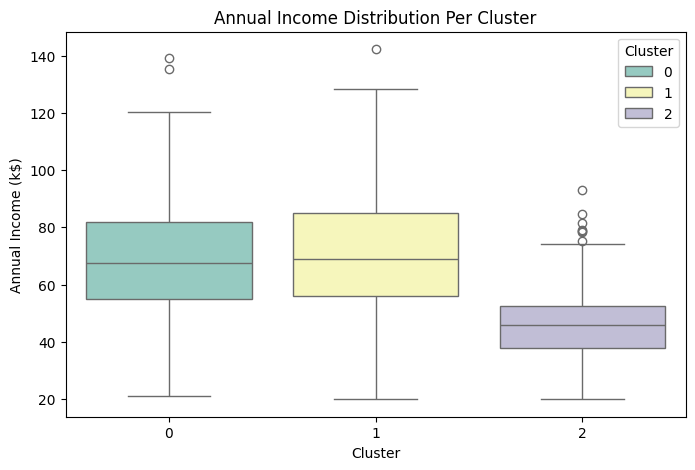

In [17]:
#Annual Income Distribution Per Cluster
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Cluster", y="Annual Income (k$)", hue="Cluster", palette="Set3")
plt.title("Annual Income Distribution Per Cluster")
plt.savefig("Annual_income_distribution_Per_Cluster.png", dpi=300)
plt.show()

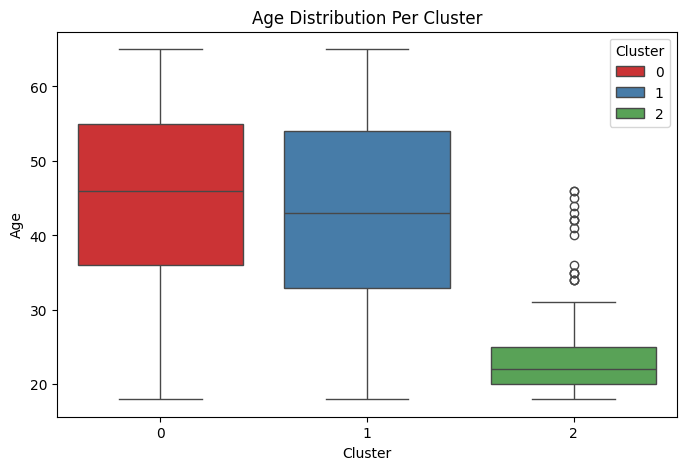

In [18]:
#Age Distribution Per Cluster
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Cluster", y="Age", hue="Cluster", palette="Set1")
plt.title("Age Distribution Per Cluster")
plt.savefig("Age_distribution_Per_Cluster.png", dpi=300)
plt.show()

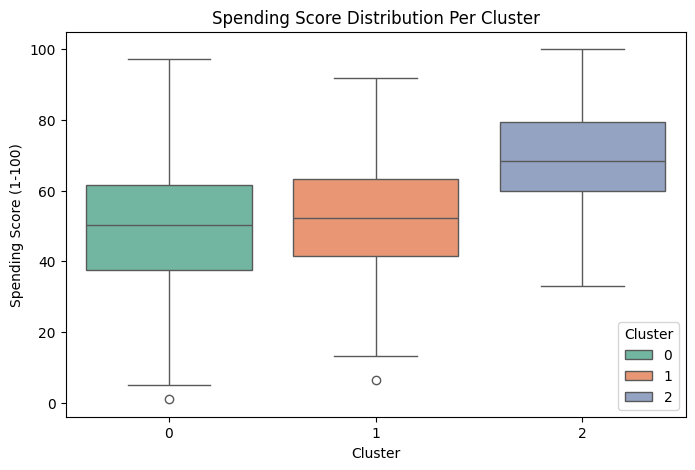

In [19]:
#Spending Score Distribution Per Cluster
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Cluster", y="Spending Score (1-100)", hue="Cluster", palette="Set2")
plt.title("Spending Score Distribution Per Cluster")
plt.savefig("Spending_Score_distribution_Per_Cluster.png", dpi=300)
plt.show()

# Cluster Profiling & Marketing Strategy

In [20]:
cluster_profile = df.groupby("Cluster")[['Age', 'Annual Income (k$)', 'Spending Score (1-100)',
                                        'Purchase Frequency (per month)', 'Years as Customer']].mean()
print(cluster_profile)

               Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                          
0        45.543657           69.167974               49.684613   
1        44.035242           71.402952               51.945903   
2        23.698795           46.824940               69.384699   

         Purchase Frequency (per month)  Years as Customer  
Cluster                                                     
0                              9.347611           9.485997  
1                              9.889868           2.480176  
2                             13.536145           6.740964  


# Count Of Categorical Features Per Cluster

In [21]:
print(df.groupby("Cluster")['Gender'].value_counts())
print(df.groupby("Cluster")['Product Category Preference'].value_counts())
print(df.groupby("Cluster")['Loyalty Membership'].value_counts())

Cluster  Gender
0        Male      321
         Female    286
1        Male      124
         Female    103
2        Female     87
         Male       79
Name: count, dtype: int64
Cluster  Product Category Preference
0        Home Decor                     191
         Luxury                         188
         Grocery                        159
         Electronics                     51
         Sports                          17
         Clothing                         1
1        Luxury                          85
         Home Decor                      56
         Grocery                         47
         Electronics                     29
         Sports                           9
         Clothing                         1
2        Clothing                        72
         Electronics                     66
         Luxury                          11
         Sports                          10
         Home Decor                       6
         Grocery                   

# Visualization For Report

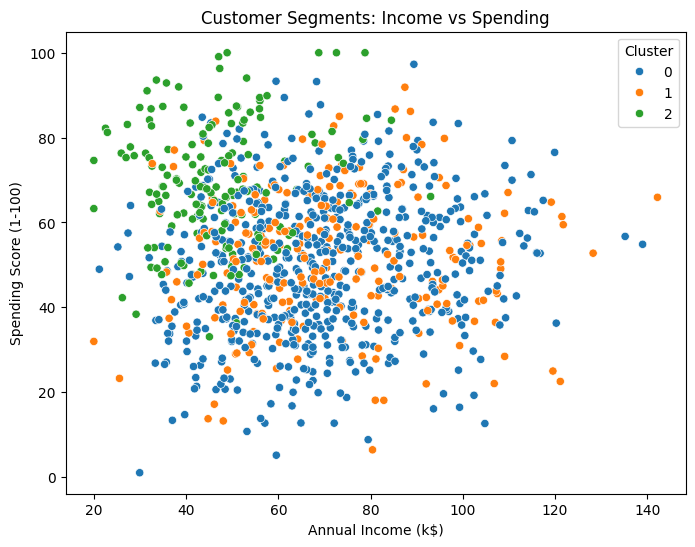

In [22]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Cluster", palette="tab10")
plt.title("Customer Segments: Income vs Spending")
plt.savefig("Customer_Segments(Income_vs_Spending).png", dpi=300)
plt.show()

# Key Insights

### Customer Segments Identified

#### Cluster 0

* Mature & Loyal Customers
* Age - 45
* Income - $69k
* Spending Score - 50 (Moderate)
* High loyalty (607 members)
* Years as customers - 9.5 yrs
* Preferences - Home Decor & Luxury

#### Cluster 1

* Mature But At-Risk Customers (Short-Term Customers)
* Age -  (Mature Almost Same As Cluster 0)
* Income - $71k
* Spending Score - 52 (Moderate)
* Low loyalty (Mostly No)
* Years as customers - 2.5 yrs
* Preferences: Luxury & Home Decor

#### Cluster 2

* Young, Trend-Driven Spenders
* Age - 24 (Young)
* Income - $47k
* Spending Score - 69(highest)
* Moderate loyalty
* Years as customers - 6.7yrs
* High purchase frequency (13.5/month)
* Preferences: Clothing & Electronics.

### Strategic Insights

* Cluster 0 = Retention Goldmine - already loyal, steady spenders.
* Cluster 1 = At-Risk Segment - potential spenders but low brand attachment.
* Cluster 2 = Growth Engine - young, impulsive, high-engagement buyers.
* Gender balance fairly even, product preferences clearly segmented.

# Recommendations

### For Cluster 0 (Loyal Base):

* Exclusive VIP perks & premium product launches.
* Anniversary/loyalty rewards to sustain engagement.

### For Cluster 1 (At-Risk):

* Personalized offers, retargeting ads, and onboarding campaigns.
* Loyalty program with strong entry benefits (welcome vouchers, first-purchase perks)

### For Cluster 2 (Young & Trendy):

* Flash sales, influencer-driven campaigns & cashback rewards.
* Bundle offers on Clothing + Electronics.
* Promote affordable loyalty memberships (student/youth discounts).

# Overall Improvements

* Test advanced clustering (GMM, DBSCAN) for better separation.
* Track customer migration between clusters over time.
* Focus marketing spend on Cluster 2 (growth) & Cluster 0 (retention) while nurturing Cluster 1.